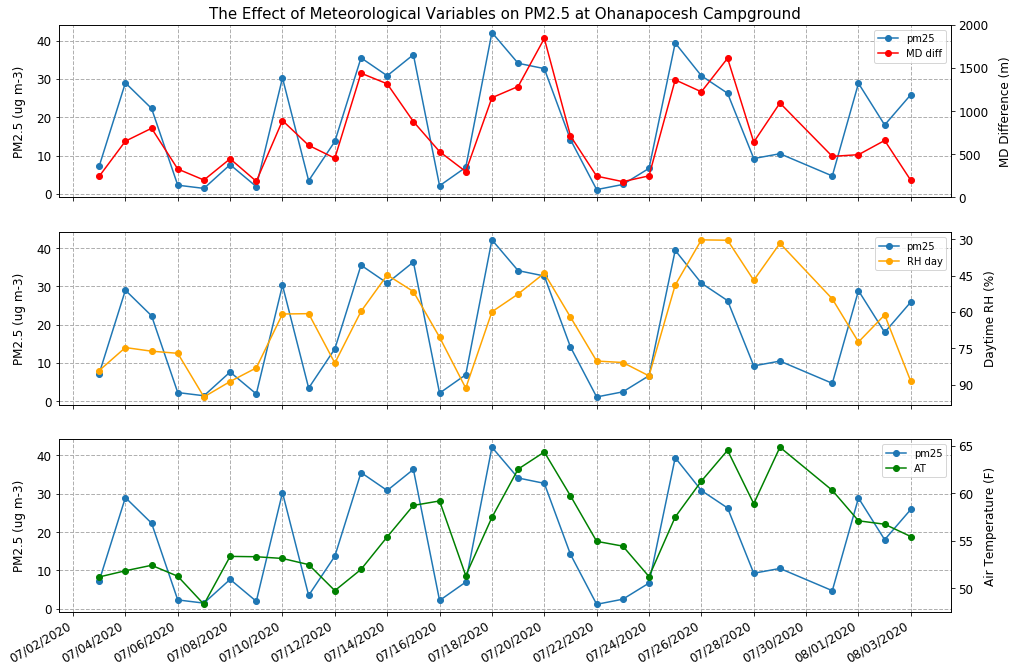

In [82]:
#################################### Subplots: Stacked plots and shared axes ###########################################################################################
########### https://stackoverflow.com/questions/54869846/matplotlib-3-0-2-produced-misaligned-date-axis-with-twinx-and-major-minor-format ###########################
##################### https://www.youtube.com/watch?v=XFZRVnP-MTU ################################################################


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

df = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_alldata_2009-2020_8pm-1am.csv')

## Filter Dataset
df = df[df['clouds_20'].notna()] #Takes only the rows where 'clouds_20' is not NaN
df = df[df['no_fires'] != 1]
df = df[df['MD_diff'] <1895]
df = df[df['year'] == 2020]

################################ Create a sublplot with three rows of plots #####################################################
####################################### Set parameters of plot ###############################
#Variables to plot
x = pd.to_datetime(df['date'],format='%m/%d/%Y')

#Set major tick formatter and locators
major_loc = mdates.DayLocator(interval=2)
major_fmt = mdates.DateFormatter('%m/%d/%Y')

fig = plt.figure(figsize=(16,12)) #size of entire cumulative plot

###############################################################################################################################
###################################### First Plot ##############################################################################
###############################################################################################################################

#Plot PM25
ax_pm25 = plt.subplot(3,1,1) #1st value = # plots, 2nd value = # columns, 3rd value = which plot it is
ax_pm25.plot_date(x, df['pm25'],'-',marker='o', label='pm25')
ax_pm25.xaxis.set_major_formatter(major_fmt)
ax_pm25.xaxis.set_major_locator(major_loc)
ax_pm25.grid('on', which='both', linestyle='--', linewidth=1)
ax_pm25.set_ylabel('PM2.5 (ug m-3)', labelpad=10,size=12)
ax_pm25.set_title('The Effect of Meteorological Variables on PM2.5 at Ohanapocesh Campground', size=15)


#Plot MD_diff
ax_MD = ax_pm25.twinx()
ax_MD.plot_date(x, df['MD_diff'],'-', c='r', marker='o', label='MD diff')
ax_MD.xaxis.set_major_formatter(major_fmt)
ax_MD.xaxis.set_major_locator(major_loc)
ax_MD.set_ylabel('MD Difference (m)', labelpad=10,size=12)
plt.gcf().autofmt_xdate()
########################## Plot legend for both lines - Have to do this because of second axis ########################################
############# https://stackoverflow.com/questions/21988196/legend-only-shows-one-label-when-plotting-with-pandas #####################
lines = ax_pm25.get_lines() + ax_MD.get_lines()
ax_pm25.legend(lines, [line.get_label() for line in lines], loc='upper right')


###############################################################################################################################
###################################### Second Plot ##############################################################################
###############################################################################################################################

#Plot PM25
_ax_pm25 = plt.subplot(3,1,2) #1st value = # plots, 2nd value = # columns, 3rd value = which plot it is
_ax_pm25.plot_date(x, df['pm25'],'-',marker='o', label='pm25')
_ax_pm25.xaxis.set_major_formatter(major_fmt)
_ax_pm25.xaxis.set_major_locator(major_loc)
_ax_pm25.grid('on', which='both', linestyle='--', linewidth=1)
_ax_pm25.set_ylabel('PM2.5 (ug m-3)', labelpad=10,size=12)
# _ax_pm25.set_title('MD & PM2.5 Ohana', loc='right')

#Plot RH_day
ax_RH = _ax_pm25.twinx()
ax_RH.plot_date(x, df['RH_day'],'-', c='orange', marker='o', label='RH day')
ax_RH.xaxis.set_major_formatter(major_fmt)
ax_RH.xaxis.set_major_locator(major_loc)
ax_RH.set_ylabel('Daytime RH (%)', labelpad=10,size=12)
ax_RH.invert_yaxis() ########## flips the axis ################
plt.gcf().autofmt_xdate()
########################## Plot legend for both lines - Have to do this because of second axis ########################################
############# https://stackoverflow.com/questions/21988196/legend-only-shows-one-label-when-plotting-with-pandas #####################
lines = _ax_pm25.get_lines() + ax_RH.get_lines()
_ax_pm25.legend(lines, [line.get_label() for line in lines], loc='upper right')


###############################################################################################################################
###################################### Third Plot ##############################################################################
###############################################################################################################################

#Plot PM25
__ax_pm25 = plt.subplot(3,1,3) #1st value = # plots, 2nd value = # columns, 3rd value = which plot it is
__ax_pm25.plot_date(x, df['pm25'],'-',marker='o', label='pm25')
__ax_pm25.xaxis.set_major_formatter(major_fmt)
__ax_pm25.xaxis.set_major_locator(major_loc)
__ax_pm25.grid('on', which='both', linestyle='--', linewidth=1)
__ax_pm25.set_ylabel('PM2.5 (ug m-3)', labelpad=10,size=12)
# _ax_pm25.set_title('MD & PM2.5 Ohana', loc='right')

#Plot RH_day
ax_T = __ax_pm25.twinx()
ax_T.plot_date(x, df['AIRTEMP_F'],'-', c='green', marker='o', label='AT')
ax_T.xaxis.set_major_formatter(major_fmt)
ax_T.xaxis.set_major_locator(major_loc)
ax_T.set_ylabel('Air Temperature (F)', labelpad=10,size=12)
# ax_T.invert_yaxis() ########## flips the axis ################

plt.gcf().autofmt_xdate()

###########################################################################################################################
##################################### Legend & Tick Parameters ##############################################################
##############################################################################################################################

########################## Plot legend for both lines - Have to do this because of second axis ########################################
############# https://stackoverflow.com/questions/21988196/legend-only-shows-one-label-when-plotting-with-pandas #####################

lines = __ax_pm25.get_lines() + ax_T.get_lines()
__ax_pm25.legend(lines, [line.get_label() for line in lines], loc='upper right')

######################## Tick Parameters ##################################################################################
################# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html #####################


# ax_pm25.set_yticks(np.linspace(0, ax_pm25.get_ybound()[1]+1, 5))
# ax_MD.set_yticks(np.linspace(0, ax_MD.get_ybound()[1]+1, 5))

# ax_pm25.set_yticks(np.linspace(0, 40, 5))
ax_MD.set_yticks(np.linspace(0, 2000, 5))

# _ax_pm25.set_yticks(np.linspace(0, ax_pm25.get_ybound()[1]+1, 5))
ax_RH.set_yticks(np.linspace(30, 90, 5))

# __ax_pm25.set_yticks(np.linspace(0, ax_pm25.get_ybound()[1]+1, 5))
ax_T.set_yticks(np.linspace(50, 65, 4))


ax_pm25.tick_params(axis='y',labelsize=12,labelcolor='black')
_ax_pm25.tick_params(axis='y',labelsize=12,labelcolor='black')
__ax_pm25.tick_params(axis='x',labelsize=12,labelcolor='black')
__ax_pm25.tick_params(axis='y',labelsize=12,labelcolor='black')
ax_MD.tick_params(axis='y',labelsize=12,labelcolor='black')
ax_RH.tick_params(axis='y',labelsize=12,labelcolor='black')
ax_T.tick_params(axis='y',labelsize=12,labelcolor='black')
# ax_MD.grid()
# ax_MD.set_yticks(np.linspace(ax_MD.get_yticks()[0], ax_MD.get_yticks()[-1], len(ax_pm25.get_yticks())))



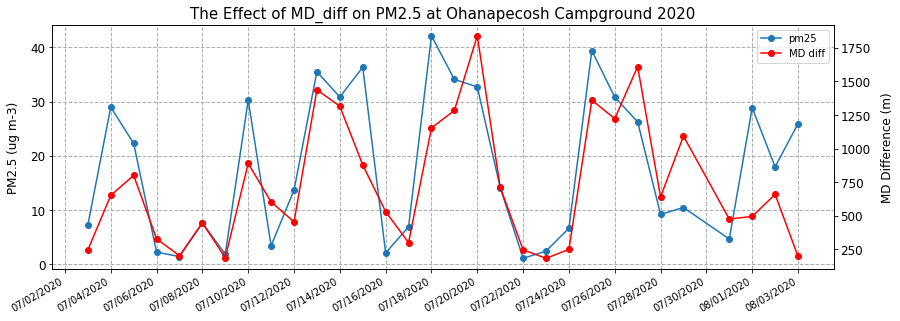

In [96]:
#################################### Subplots: Stacked plots and shared axes ###########################################################################################
########### https://stackoverflow.com/questions/54869846/matplotlib-3-0-2-produced-misaligned-date-axis-with-twinx-and-major-minor-format ###########################
##################### https://www.youtube.com/watch?v=XFZRVnP-MTU ################################################################


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

df = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_alldata_2009-2020_8pm-1am.csv')

## Filter Dataset
df = df[df['clouds_20'].notna()] #Takes only the rows where 'clouds_20' is not NaN
df = df[df['no_fires'] != 1]
df = df[df['MD_diff'] <1895]
df = df[df['year'] == 2020]

################################ Create a sublplot with three rows of plots #####################################################
####################################### Set parameters of plot ###############################
#Variables to plot
x = pd.to_datetime(df['date'],format='%m/%d/%Y')

#Set major tick formatter and locators
major_loc = mdates.DayLocator(interval=2)
major_fmt = mdates.DateFormatter('%m/%d/%Y')

fig = plt.figure(figsize=(14,5)) #size of entire cumulative plot

###############################################################################################################################
###################################### First Plot ##############################################################################
###############################################################################################################################

#Plot PM25
ax_pm25 = plt.subplot(1,1,1) #1st value = # plots, 2nd value = # columns, 3rd value = which plot it is
ax_pm25.plot_date(x, df['pm25'],'-',marker='o', label='pm25')
ax_pm25.xaxis.set_major_formatter(major_fmt)
ax_pm25.xaxis.set_major_locator(major_loc)
ax_pm25.grid('on', which='both', linestyle='--', linewidth=1)
ax_pm25.set_ylabel('PM2.5 (ug m-3)', labelpad=10,size=12)
ax_pm25.set_title('The Effect of MD_diff on PM2.5 at Ohanapecosh Campground 2020', size=15)


#Plot MD_diff
ax_MD = ax_pm25.twinx()
ax_MD.plot_date(x, df['MD_diff'],'-', c='r', marker='o', label='MD diff')
ax_MD.xaxis.set_major_formatter(major_fmt)
ax_MD.xaxis.set_major_locator(major_loc)
ax_MD.set_ylabel('MD Difference (m)', labelpad=10,size=12)
plt.gcf().autofmt_xdate()
########################## Plot legend for both lines - Have to do this because of second axis ########################################
############# https://stackoverflow.com/questions/21988196/legend-only-shows-one-label-when-plotting-with-pandas #####################
lines = ax_pm25.get_lines() + ax_MD.get_lines()
ax_pm25.legend(lines, [line.get_label() for line in lines], loc='upper right')


###########################################################################################################################
##################################### Legend & Tick Parameters ##############################################################
##############################################################################################################################

########################## Plot legend for both lines - Have to do this because of second axis ########################################
############# https://stackoverflow.com/questions/21988196/legend-only-shows-one-label-when-plotting-with-pandas #####################

lines = __ax_pm25.get_lines() + ax_T.get_lines()
__ax_pm25.legend(lines, [line.get_label() for line in lines], loc='upper right')

######################## Tick Parameters ##################################################################################
################# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html #####################


# ax_pm25.set_yticks(np.linspace(0, ax_pm25.get_ybound()[1]+1, 5))
# ax_MD.set_yticks(np.linspace(0, ax_MD.get_ybound()[1]+1, 5))

# ax_pm25.set_yticks(np.linspace(0, 40, 5))
# ax_MD.set_yticks(np.linspace(0, 2000, 5))


ax_pm25.tick_params(axis='y',labelsize=12,labelcolor='black')

ax_MD.tick_params(axis='y',labelsize=12,labelcolor='black')

